In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM


E:\Python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# since we are using stateful rnn tsteps can be set to 1
tsteps = 1
batch_size = 25
epochs = 25
# number of elements ahead that are used to make the prediction
lahead = 1

In [3]:
def gen_cosine_amp(amp=100, period=1000, x0=0, xn=50000, step=1, k=0.0001):
    """Generates an absolute cosine time series with the amplitude
    exponentially decreasing
    Arguments:
        amp: amplitude of the cosine function
        period: period of the cosine function
        x0: initial x of the time series
        xn: final x of the time series
        step: step of the time series discretization
        k: exponential rate
    """
    cos = np.zeros(((xn - x0) * step, 1, 1))
    for i in range(len(cos)):
        idx = x0 + i * step
        cos[i, 0, 0] = amp * np.cos(2 * np.pi * idx / period)
        cos[i, 0, 0] = cos[i, 0, 0] * np.exp(-k * idx)
    return cos


print('Generating Data')
cos = gen_cosine_amp()
print('Input shape:', cos.shape)

Generating Data
Input shape: (50000, 1, 1)


In [4]:
expected_output = np.zeros((len(cos), 1))
for i in range(len(cos) - lahead):
    expected_output[i, 0] = np.mean(cos[i + 1:i + lahead + 1])

print('Output shape')
print(expected_output.shape)

Output shape
(50000, 1)


In [5]:
print('Creating Model')
model = Sequential()
model.add(LSTM(50,
               batch_input_shape=(batch_size, tsteps, 1),
               return_sequences=True,
               stateful=True))
model.add(LSTM(50,
               return_sequences=False,
               stateful=True))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

Creating Model


In [6]:
print('Training')
for i in range(epochs):
    print('Epoch', i, '/', epochs)
    model.fit(cos,
              expected_output,
              batch_size=batch_size,
              verbose=1,
              nb_epoch=1,
              shuffle=False)
    model.reset_states()


Training
Epoch 0 / 25


E:\Python\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Epoch 1/1
50000/50000 [==============================] - 11s 224us/step - loss: 370.6773
Epoch 1 / 25
Epoch 1/1
50000/50000 [==============================] - 11s 225us/step - loss: 218.7704
Epoch 2 / 25
Epoch 1/1
50000/50000 [==============================] - 9s 178us/step - loss: 133.0193
Epoch 3 / 25
Epoch 1/1
50000/50000 [==============================] - 9s 180us/step - loss: 85.5140
Epoch 4 / 25
Epoch 1/1
50000/50000 [==============================] - 9s 179us/step - loss: 64.1413
Epoch 5 / 25
Epoch 1/1
50000/50000 [==============================] - 8s 170us/step - loss: 66.9552
Epoch 6 / 25
Epoch 1/1
50000/50000 [==============================] - 8s 158us/step - loss: 37.0733
Epoch 7 / 25
Epoch 1/1
50000/50000 [==============================] - 8s 158us/step - loss: 30.5344
Epoch 8 / 25
Epoch 1/1
50000/50000 [==============================] - 8s 158us/step - loss: 22.8471
Epoch 9 / 25
Epoch 1/1
50000/50000 [==============================] - 8s 160us/step - loss: 15.0100
Epoch 10

Predicting
Plotting Results


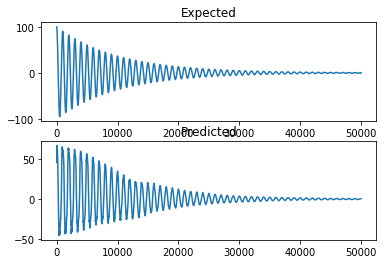

In [7]:
print('Predicting')
predicted_output = model.predict(cos, batch_size=batch_size)

print('Plotting Results')
plt.subplot(2, 1, 1)
plt.plot(expected_output)
plt.title('Expected')
plt.subplot(2, 1, 2)
plt.plot(predicted_output)
plt.title('Predicted')
plt.show()

In [8]:
import pandas as pd
df = pd.DataFrame(predicted_output)
df.head(50)

,0
0,46.019295
1,46.019165
2,46.018997
3,46.018791
4,46.018536
5,46.018242
6,46.017906
7,46.017532
8,46.017109
9,46.016647


In [9]:
import pandas as pd
df = pd.DataFrame(expected_output)
df.head(50)

,0
0,99.988027
1,99.972108
2,99.952245
3,99.928440
4,99.900693
5,99.869008
6,99.833386
7,99.793829
8,99.750339
9,99.702920
